In [3]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D

from matplotlib import colormaps as cm

file = ET.parse('C:/Users/Felix/Desktop/Máster  BD Deporte/Módulo 7 - Proveedores de Datos Deportivos/Liga Primera 23/f1/srml-23-2022-results.xml')

In [ ]:
import pandas as pd

def results(path):

    file = ET.parse(path)

    # Initialize data containers
    teams = {}
    data=[]

    # Iterate through XML tree
    for season in file.getroot():
        season_name = season.attrib.get("season_name")

        for team in season.findall("Team"):
            key=team.attrib.get("uID")
            name=team.find("Name").text
            teams[key]=name

        for match in season.findall("MatchData"):
            for stats in match.findall("MatchInfo"):
                match_day=stats.attrib.get("MatchDay")

            for stats in match.findall("TeamData"):
                if stats.attrib.get("Side")=="Home":
                    home_team=stats.attrib.get("TeamRef")
                    score_home=stats.attrib.get("Score")
                    
                else:
                    away_team=stats.attrib.get("TeamRef")
                    score_away=stats.attrib.get("Score")

            result="1" if score_home > score_away else "2" if  score_home < score_away  else "x" 
            data.append([season_name,match_day, teams[home_team],score_home,score_away, teams[away_team],result])

    df=pd.DataFrame(data, columns=["Season","Match Day","Local","Local Goals","Away Goals","Away","Result"])

In [5]:
df[df["Match Day"]=="4"]

,Season,Match Day,Local,Local Goals,Away Goals,Away,Result
30,Season 2022/2023,4,Celta de Vigo,3,0,Cádiz,1
31,Season 2022/2023,4,Mallorca,1,1,Girona,x
32,Season 2022/2023,4,Real Madrid,2,1,Real Betis,1
33,Season 2022/2023,4,Real Sociedad,1,1,Atlético de Madrid,x
34,Season 2022/2023,4,Sevilla,0,3,Barcelona,2
35,Season 2022/2023,4,Athletic Club,0,1,Espanyol,2
36,Season 2022/2023,4,Osasuna,2,1,Rayo Vallecano,1
37,Season 2022/2023,4,Valencia CF,5,1,Getafe,1
38,Season 2022/2023,4,Villarreal,4,0,Elche,1
39,Season 2022/2023,4,Real Valladolid,1,0,Almería,1


In [ ]:
# Initialize data containers
teams = {}
data=[]

# Iterate through XML tree
for season in file.getroot():
    season_name = season.attrib.get("season_name")

    for team in season.findall("Team"):
        key=team.attrib.get("uID")
        name=team.find("Name").text
        teams[key]=name

    for match in season.findall("MatchData"):
        for stats in match.findall("MatchInfo"):
            match_day=stats.attrib.get("MatchDay")

        for stats in match.findall("TeamData"):
            if stats.attrib.get("Side")=="Home":
                home_team=stats.attrib.get("TeamRef")
                score_home=stats.attrib.get("Score")
                
            else:
                away_team=stats.attrib.get("TeamRef")
                score_away=stats.attrib.get("Score")

        
        if int(match_day)<=19:
            home_difference=int(score_home) - int(score_away) 
            data.append([teams[home_team], teams[away_team],int(match_day), home_difference])
        else:
            away_difference=int(score_away) - int(score_home)
            data.append([teams[away_team], teams[home_team],int(match_day), away_difference])

diferencia_duelos_directos=pd.DataFrame(data, columns=["Local","Away","Match Day","Goals difference"])
diferencia_duelos_directos = diferencia_duelos_directos.sort_values(by='Match Day')

# Agrupamos por pares de equipos y calculamos la suma acumulada
diferencia_duelos_directos['Teams Goal Difference'] = (
    diferencia_duelos_directos
    .groupby(['Local', 'Away'])['Goals difference']
    .cumsum()
)

In [7]:
diferencia_duelos_directos

,Local,Visitante,Jornada,Diferencia goles,Diferencia goles equipos
0,Osasuna,Sevilla,1,1,1
1,Barcelona,Rayo Vallecano,1,0,0
2,Celta de Vigo,Espanyol,1,0,0
3,Real Valladolid,Villarreal,1,-3,-3
4,Almería,Real Madrid,1,-1,-1
...,...,...,...,...,...
371,Cádiz,Elche,38,0,0
378,Getafe,Real Valladolid,38,0,-1
379,Atlético de Madrid,Villarreal,38,0,-2
377,Sevilla,Real Sociedad,38,-1,-2


In [110]:
import pandas as pd

# Initialize data containers
teams = {}
data=[]

# Iterate through XML tree
for season in file.getroot():
    season_name = season.attrib.get("season_name")

    for team in season.findall("Team"):
        key=team.attrib.get("uID")
        name=team.find("Name").text
        teams[key]=name

    for match in season.findall("MatchData"):
        for stats in match.findall("MatchInfo"):
            jornada=stats.attrib.get("MatchDay")

        for stats in match.findall("TeamData"):
            if stats.attrib.get("Side")=="Home":
                home_team=stats.attrib.get("TeamRef")
                score_home=stats.attrib.get("Score")
                
            else:
                away_team=stats.attrib.get("TeamRef")
                score_away=stats.attrib.get("Score")

        diferencia_home=int(score_home) - int(score_away)
        diferencia_away=int(score_away) - int(score_home)
        
        puntos_home=3 if diferencia_home > 0 else 0 if  diferencia_home < 0  else 1 
        puntos_away=3 if diferencia_away > 0 else 0 if  diferencia_away < 0  else 1 

        data.append([season_name,int(jornada), teams[home_team],int(score_home),diferencia_home,puntos_home])
        data.append([season_name,int(jornada), teams[away_team],int(score_away),diferencia_away,puntos_away])

df1=pd.DataFrame(data, columns=["Temporada","Jornada","Equipo","Goles a favor","Diferencia Goles","Puntos"])
df1['Puntos'] = df1.groupby('Equipo')['Puntos'].cumsum()
df1['Diferencia Goles'] = df1.groupby('Equipo')['Diferencia Goles'].cumsum()
df1['Goles a favor'] = df1.groupby('Equipo')['Goles a favor'].cumsum()

In [ ]:
def desempate(jornada,equipos_list):
    puntos={}
    for equipos in equipos_list:
        equipo_a, equipo_b = equipos
        directos_filtered=diferencia_duelos_directos[(diferencia_duelos_directos["Local"]==equipo_a) & (diferencia_duelos_directos["Visitante"]==equipo_b)]
        if directos_filtered.empty==True:
            directos_filtered=diferencia_duelos_directos[(diferencia_duelos_directos["Local"]==equipo_b) & (diferencia_duelos_directos["Visitante"]==equipo_a)]

        directos_filtered_jornada=directos_filtered[directos_filtered["Jornada"]<= jornada].sort_values(by="Jornada").head(1)
        directos_filtered_jornada=directos_filtered_jornada.reset_index(drop=True)
        ### Criterio diferencia de goles en duelos directos
        if (directos_filtered_jornada.empty==False) and (directos_filtered_jornada["Diferencia goles equipos"] != 0).all():
            if (directos_filtered_jornada["Diferencia goles equipos"]<0).all():
                puntos[directos_filtered_jornada.loc[0,"Visitante"]]=puntos.get(directos_filtered_jornada.loc[0,"Visitante"], 0.0) + 0.01
                puntos[directos_filtered_jornada.loc[0,"Local"]]=puntos.get(directos_filtered_jornada.loc[0,"Local"], 0.0)
            elif (directos_filtered_jornada["Diferencia goles equipos"] > 0).all():
                puntos[directos_filtered_jornada.loc[0,"Local"]]=puntos.get(directos_filtered_jornada.loc[0,"Local"], 0.0) + 0.01
                puntos[directos_filtered_jornada.loc[0,"Visitante"]]=puntos.get(directos_filtered_jornada.loc[0,"Visitante"], 0.0)
        
        ### Criterio diferencia de goles acumulada
        balance=df1[df1["Jornada"]==jornada]
        balance_equipo_a=int(balance[balance["Equipo"]==equipo_a]["Diferencia Goles"].values[0])      
        balance_equipo_b=int(balance[balance["Equipo"]==equipo_b]["Diferencia Goles"].values[0])
        if balance_equipo_a > balance_equipo_b:
            puntos[equipo_a]=puntos.get(equipo_a, 0.0) + 0.01
            puntos[equipo_b]=puntos.get(equipo_b, 0.0)
        elif balance_equipo_a < balance_equipo_b:
            puntos[equipo_b]=puntos.get(equipo_b, 0.0) + 0.01
            puntos[equipo_a]=puntos.get(equipo_a, 0.0)
        
        ### Criterio goles a favor
        goles_equipo_a=int(balance[balance["Equipo"]==equipo_a]["Goles a favor"].values[0])
        goles_equipo_b=int(balance[balance["Equipo"]==equipo_b]["Goles a favor"].values[0])
        if goles_equipo_a > goles_equipo_b:
            puntos[equipo_a]=puntos.get(equipo_a, 0.0) + 0.01
            puntos[equipo_b]=puntos.get(equipo_b, 0.0)
        elif goles_equipo_a < goles_equipo_b:
            puntos[equipo_b]=puntos.get(equipo_b, 0.0) + 0.01
            puntos[equipo_a]=puntos.get(equipo_a, 0.0)
        
        puntos = {k: round(v, 2) for k, v in puntos.items()}
            
                
    return dict(sorted(puntos.items(), key=lambda item: item[1], reverse=True))


In [ ]:
import itertools
import pandas as pd
import numpy as np

result = pd.DataFrame()

def league_table():
    for jornada in np.sort(df1["Jornada"].unique()):
        df_filtered = df1[df1["Jornada"] == jornada].copy()
        df_filtered['Puntos_ajustado'] = df_filtered['Puntos'].astype(float)  

        # Encontramos los registros con puntos duplicados
        df_filtered_dup = df_filtered[df_filtered.duplicated(subset="Puntos", keep=False)]

        for puntos in df_filtered_dup["Puntos"].unique():
            df_filtered_pt = df_filtered_dup[df_filtered_dup["Puntos"] == puntos]

            # Lista de tuplas con las distintas combinaciones posibles
            teams = list(itertools.combinations(df_filtered_pt["Equipo"].unique(), 2))

            # Almacenamos el resultado de desempate para evitar llamarlo varias veces
            desempate_dic = desempate(jornada, teams)
            if desempate_dic:
                # Map adjustments only to relevant rows
                for equipo, ajuste in desempate_dic.items():
                    df_filtered.loc[df_filtered["Equipo"] == equipo, "Puntos_ajustado"] += ajuste

        result = pd.concat([result, df_filtered], ignore_index=True)

    # Final cleanup
    # result = result.drop_duplicates().reset_index(drop=True)

    result_sorted = result.sort_values(by=["Jornada",'Puntos_ajustado'], ascending=[True, False])

    # Añadimos la columna de clasificación
    result['Clasificación'] = result_sorted.groupby('Jornada').cumcount() + 1
    # df1['Clasificación']=df1['Clasificación'].astype("string")
    result=result.sort_values(by=["Jornada","Clasificación"])
    result=result.reset_index(drop=True)
    result=result.drop(columns=["Puntos_ajustado"])    

    return result

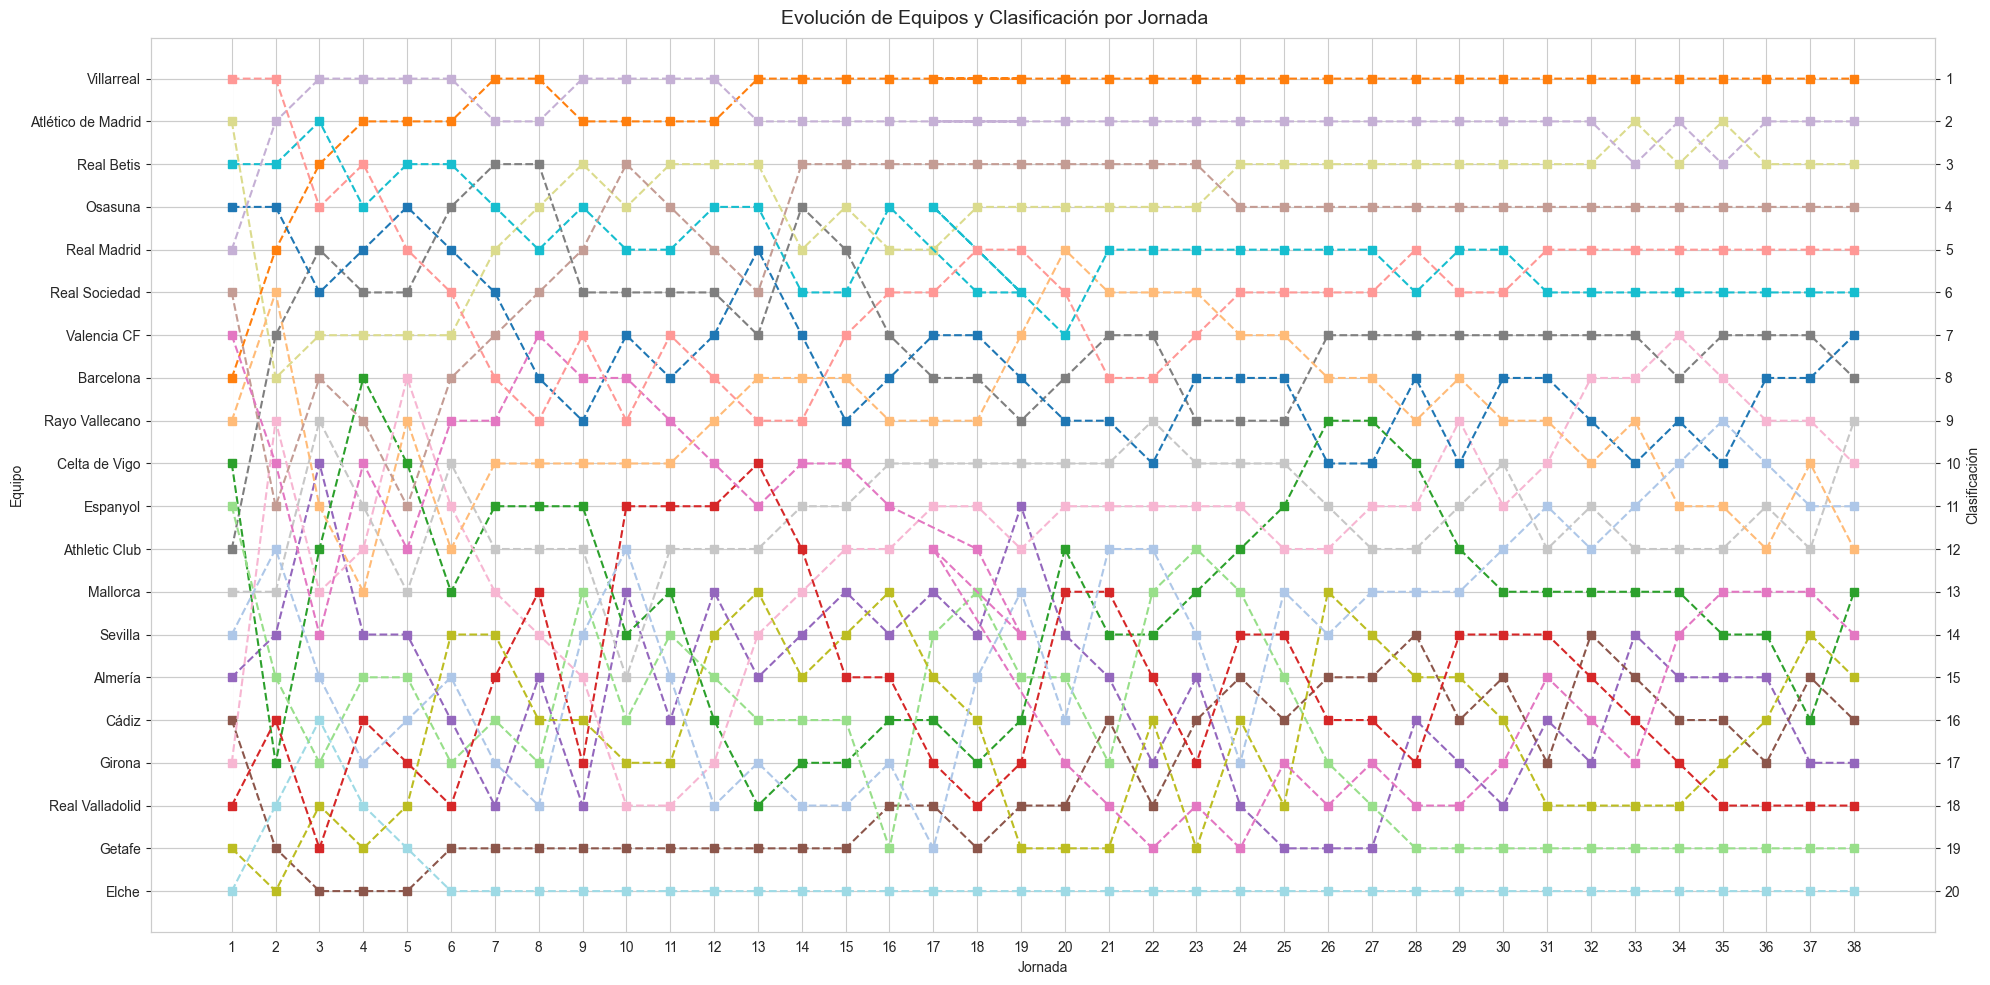

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import MaxNLocator

# Estilo visual
sns.set_style("whitegrid")

# Datos simulados

# Crear DataFrame
df = df1[["Jornada","Equipo","Clasificación"]]

# Crear figura y eje principal
fig, ax1 = plt.subplots(figsize=(20, 10))

# Eje Y izquierdo - Equipo
colores_equipos = dict(zip(df['Equipo'].unique(), sns.color_palette("tab20", len(df['Equipo'].unique()))))


    
ax1.set_xlabel('Jornada')
ax1.set_ylabel('Equipo')
jornada_1=df[df['Jornada']=="1"].sort_values("Clasificación",ascending=False)
ax1.plot(jornada_1['Jornada'], jornada_1['Equipo'], marker=',',color="white", label='Equipo')
ax1.tick_params(axis='y')

# Eje Y derecho - Clasificación
ax2 = ax1.twinx()
# color_clasificacion = 'tab:white'
ax2.set_ylabel('Clasificación')
for equipo in np.sort(df['Equipo'].unique()):
    datos_equipo = df[df['Equipo'] == equipo]
    ax2.plot(datos_equipo['Jornada'], datos_equipo['Clasificación'],color=colores_equipos[equipo], linestyle='--', marker='s', label='Clasificación')

min_y=int(min(jornada_1["Clasificación"]))
max_y=int(max(jornada_1["Clasificación"]))
ax2.set_yticks(range(min_y, max_y + 1))
# ax2.tick_params(axis='y', labelcolor=color_clasificacion)
ax2.set_ylim(ax2.get_ylim()[::-1])

# Título y leyenda
fig.suptitle('Evolución de Equipos y Clasificación por Jornada', fontsize=14)
fig.tight_layout()
plt.show()
